----------------------------------Machine Learning Regression Model-----------------------------------------------------

Importing Necessary Libraries

In [173]:

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error
import matplotlib.pyplot as plt
import pickle

Loading Training and Testing Datasets

In [174]:
train_df=pd.read_csv("train_data.csv",names=["f1", "f2","f3","target"])
test_df = pd.read_csv("test_data.csv",names=["f1", "f2","f3","target"])
#Copying DataFrames
train_data = train_df.copy()
test_data  = test_df.copy()

In [175]:
train_data.head(3)

,f1,f2,f3,target
0,6.501996,-8.536983,3.422935,119980.220246
1,1.328383,8.943578,-8.145307,29890.224974
2,0.161478,-7.928351,1.628924,3245.579405


In [176]:
test_data.head(3)

,f1,f2,f3,target
0,-1.453098,-3.535848,4.957581,5738.079257
1,-0.951478,-4.954119,-4.572673,391.728338
2,3.876805,9.707116,6.012681,72127.820634


In [177]:
#Checking the Shape Of the Data
print(train_data.shape)
print(test_data.shape)

(10000, 4)
(5000, 4)


Checking For Data Skewness

In [178]:
print("Skewness of train_data :\n",train_data.skew(),"\n")
print("Skewness of test_data :\n",test_data.skew())

Skewness of train_data :
 f1       -0.010381
f2        0.029293
f3        0.007262
target    2.504328
dtype: float64 

Skewness of test_data :
 f1       -0.010449
f2        0.013353
f3        0.019162
target    2.532295
dtype: float64


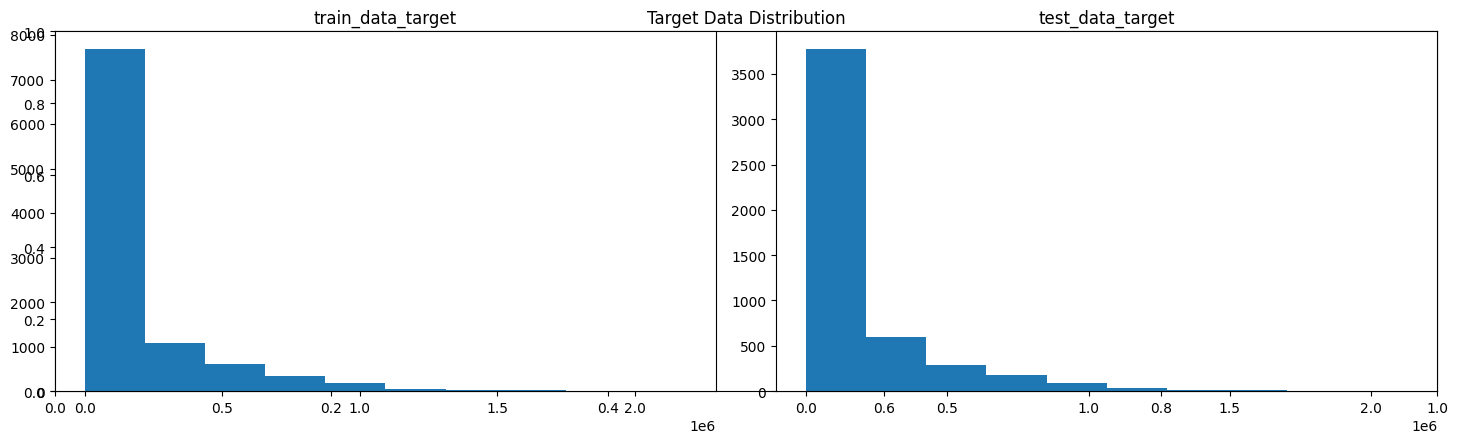

In [179]:
#Plotting graph for Visualizing Skewness in Target Variable
plt.figure(figsize=(15,5))
plt.title("Target Data Distribution")
plt.subplot(1,2,1)
plt.hist(train_data["target"])
plt.title("train_data_target")
plt.subplot(1,2,2)
plt.hist(test_data["target"])
plt.title("test_data_target")
plt.tight_layout()
plt.show()

In [180]:
#Logarithmic Transformation to Resolve Skewness in Target Variable(Label)
train_data['target'] = np.log1p(train_data['target'])
test_data['target'] = np.log1p(test_data['target'])

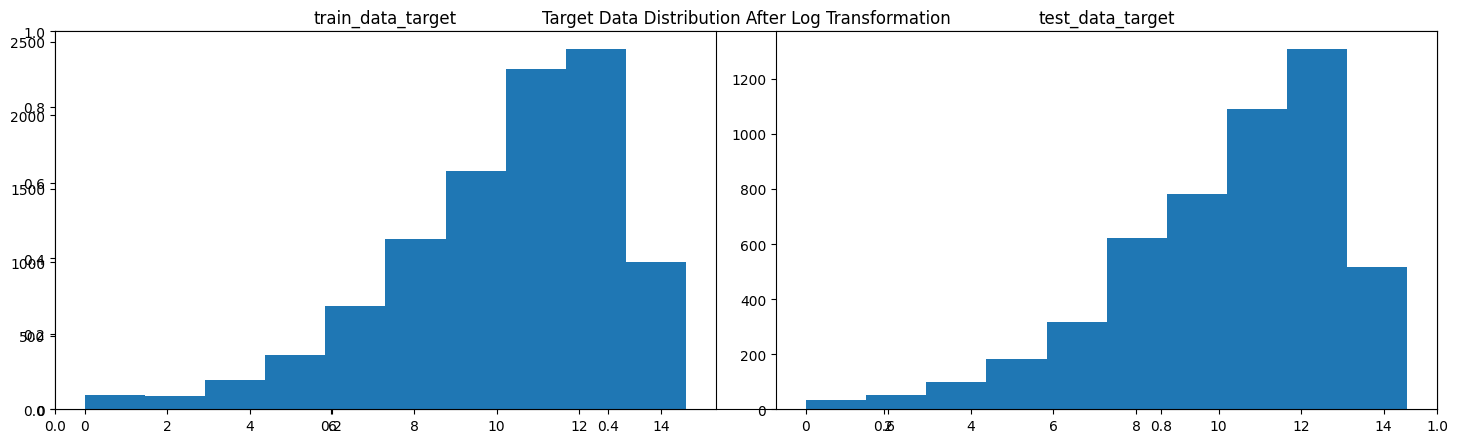

Skewness of train_data :
 f1       -0.010381
f2        0.029293
f3        0.007262
target   -1.039491
dtype: float64 

Skewness of test_data :
 f1       -0.010449
f2        0.013353
f3        0.019162
target   -1.018081
dtype: float64


In [181]:
#Plotting graph for Visualizing Target Distribution after Logarithmic Transformation
plt.figure(figsize=(15,5))
plt.title("Target Data Distribution After Log Transformation")
plt.subplot(1,2,1)
plt.hist(train_data["target"])
plt.title("train_data_target")
plt.subplot(1,2,2)
plt.hist(test_data["target"])
plt.title("test_data_target")
plt.tight_layout()
plt.show()
print("Skewness of train_data :\n",train_data.skew(),"\n")
print("Skewness of test_data :\n",test_data.skew())

Splitting the Datas for Training and Testing

In [182]:
#Training datasets
X_train = train_data.iloc[:,:-1]
y_train = train_data.iloc[:,-1]

#Testing datasets
X_test = test_data.iloc[:4990,:-1]
y_test = test_data.iloc[:4990,-1]

Feature Scaling

In [183]:
#Using StandardScalar,the Features are Preprocessed
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
#-----------------------------------------------------------------------------------------------------------------------
#Saving sc model
with open ("sc.pkl","wb") as file:
    pickle.dump(sc,file)

 Function for fitting different models

In [184]:

def linear_models(model):
    mod=model.fit(X_train,y_train)
    y_pred=mod.predict(X_test)
    
    #Saving MLP Model 
    if isinstance(model,MLPRegressor) and model.learning_rate_init==0.001 and model.hidden_layer_sizes==(64, 32) and model.activation=='relu'and model.max_iter==1000:
       with open ("mlp_model.pkl","wb") as file:
           pickle.dump(mod,file)
           
    mse = mean_squared_error(y_test,y_pred)
    mae= mean_absolute_error(y_test,y_pred)
    return mse,mae

In [185]:
#List of MAE and MSE for plotting graph
MSE=[]
MAE=[]
#Model list
model_list=[SVR(kernel="rbf",C=1.0),RandomForestRegressor(random_state=42),MLPRegressor(learning_rate_init=0.001, hidden_layer_sizes=(64, 32), activation='relu', max_iter=1000)]
model_name_list=["Support Vector Regressor","Random Forest Regressor","MLPRegressor"]
print("-------------------------------------Evaluation Metrics----------------------------------------------------------")
for model,model_name in zip(model_list,model_name_list):
    mse,mae=linear_models(model)
    MSE.append(mse)
    MAE.append(mae)
    print(f"{model_name}:")
    print("   Mean Squared Error=",round(mse,3))
    print("   Mean Absolute Error=",round(mae,3))
    print("-------------------------------------------------------------------------------------------------------------------------")

-------------------------------------Evaluation Metrics----------------------------------------------------------
Support Vector Regressor:
   Mean Squared Error= 1.384
   Mean Absolute Error= 0.543
-------------------------------------------------------------------------------------------------------------------------
Random Forest Regressor:
   Mean Squared Error= 0.367
   Mean Absolute Error= 0.253
-------------------------------------------------------------------------------------------------------------------------
MLPRegressor:
   Mean Squared Error= 0.295
   Mean Absolute Error= 0.27
-------------------------------------------------------------------------------------------------------------------------


Plotting Graph

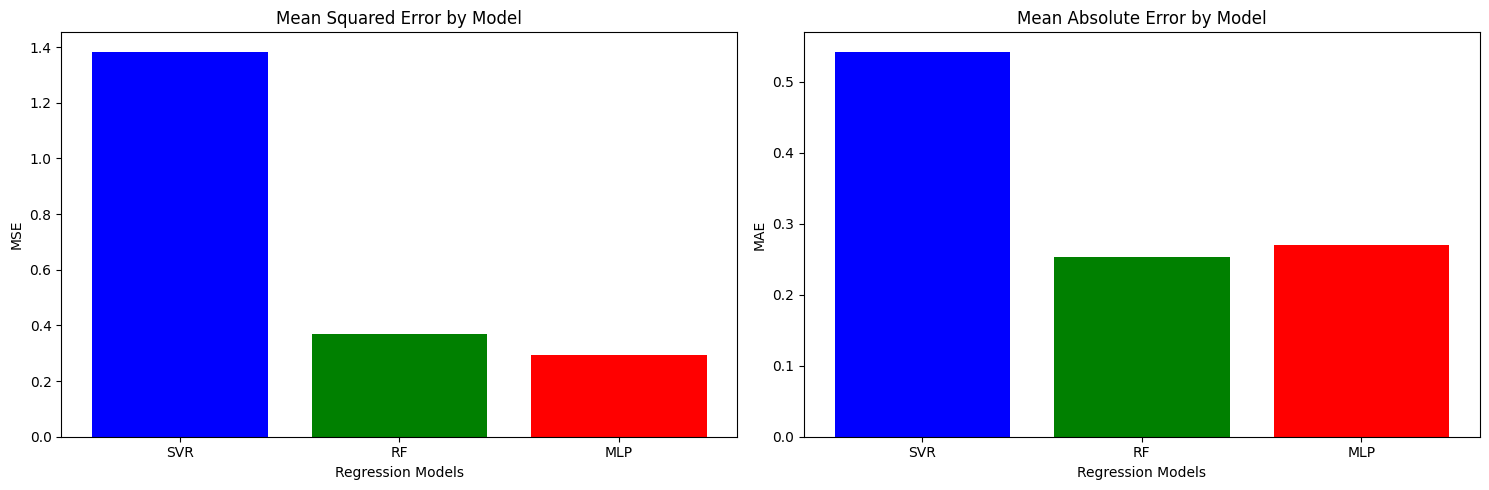

In [186]:
#MSE graph
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.bar(["SVR","RF","MLP"],MSE,color=['blue','green','red'])
plt.title("Mean Squared Error by Model")
plt.xlabel("Regression Models")
plt.ylabel("MSE")
#MAE graph
plt.subplot(1,2,2)
plt.bar(["SVR","RF","MLP"],MAE,color=['blue','green','red'])
plt.title("Mean Absolute Error by Model")
plt.xlabel("Regression Models")
plt.ylabel("MAE")
plt.tight_layout()
plt.show()

Without Retransforming the Target Variable

In [187]:
df_sample=test_data.iloc[4990:,:].copy()
actual_value=[]
predicted_value=[]
for index,row in df_sample.iterrows():
    f1= row.iloc[0]
    f2= row.iloc[1]
    f3= row.iloc[2]
    target=row.iloc[3]
    actual_value.append(target)
    #Creating a dataframe using input values
    data={"f1":f1,"f2":f2,"f3":f3}
    sample_df=pd.DataFrame(data,index=[0])
    #---------------------------------------------------------------------------------------------------------------------
    #Loading  trained models
    with open ("sc.pkl","rb") as file:
       sc=pickle.load(file)
    with open ("mlp_model.pkl","rb") as file:
        model=pickle.load(file)
    #-------------------------------------------------------------------------------------------------------------------  
    #Testing the model
    sample_input=sc.transform(sample_df) #Standard Scalar
    prediction=model.predict(sample_input) #Linear Regresssion
    predicted_value.append(prediction[0])
#---------------------------------------------------------------------------------------------------------------------     
#Output DataFrame   
output_df=pd.DataFrame({"Actual Value":actual_value,"Predicted Value":predicted_value})  
output_df 

,Actual Value,Predicted Value
0,2.839773,4.136628
1,11.130041,11.321058
2,12.799060,13.202919
3,8.097977,7.896264
4,11.696350,11.608391
5,11.975551,11.963373
6,5.789195,5.605338
7,10.928533,11.038257
8,12.942108,12.925891
9,12.607493,12.420079


With Retransforming the Target Variable

In [188]:
#Taking Last 10 Data From "train_data" For Evaluation
df_sample=test_df.iloc[4990:,:].copy()
df_sample

,f1,f2,f3,target
4990,1.386472,-4.655826,-3.635946,16.111887
4991,-6.835421,4.775112,0.347652,68188.199060
4992,9.569333,-4.569026,-8.409805,361876.112390
4993,5.969757,0.244242,-7.149024,3286.808708
4994,5.936275,2.655975,6.442307,120131.456287
4995,7.325928,-2.517590,0.681199,158822.870077
4996,5.063459,-1.450395,-7.034063,325.749863
4997,-6.716127,2.112438,2.746665,55743.437853
4998,8.971959,-3.130959,-5.372547,417527.327099
4999,7.204144,5.134398,6.773530,298787.904481


In [189]:
df_sample=test_df.iloc[4990:,:].copy()
actual_value=[]
predicted_value=[]
for index,row in df_sample.iterrows():
    f1= row.iloc[0]
    f2= row.iloc[1]
    f3= row.iloc[2]
    target=row.iloc[3]
    actual_value.append(target)
    #Creating a dataframe using input values
    data={"f1":f1,"f2":f2,"f3":f3}
    sample_df=pd.DataFrame(data,index=[0])
    #---------------------------------------------------------------------------------------------------------------------
    #Loading  trained models
    with open ("sc.pkl","rb") as file:
       sc=pickle.load(file)
    with open ("mlp_model.pkl","rb") as file:
        model=pickle.load(file)
    #-------------------------------------------------------------------------------------------------------------------  
    #Testing the model
    sample_input=sc.transform(sample_df) #Standard Scalar
    prediction=model.predict(sample_input) #Linear Regresssion
    #------------------------------------------------------------------------------------------------------------------
    # undo the logarithmic transformation
    prediction = np.expm1(prediction)  # Reversing the logarithmic transformation
    predicted_value.append(prediction[0]) 
#---------------------------------------------------------------------------------------------------------------------     
#Output DataFrame   
output_df=pd.DataFrame({"Actual Value":actual_value,"Predicted Value":predicted_value})  
output_df 

,Actual Value,Predicted Value
0,16.111887,61.591404
1,68188.199060,82540.647586
2,361876.112390,541943.562875
3,3286.808708,2686.223434
4,120131.456287,110016.039222
5,158822.870077,156900.426868
6,325.749863,270.873744
7,55743.437853,62208.156626
8,417527.327099,410810.946651
9,298787.904481,247725.091074
